# Note

* All airline, all price
* 2023-07-13 : initial: all airlines, remove outlier, LR, simplify isotonic
* 2023-07-30 : update graph format, simplified equation
* 2023-08-11 : update get_slope, get_intercept, get_linear_equation, equations
* 2023-08-12 : add y_hat for LR

# Setup

In [1]:
import os
import pandas as pd
from datetime import datetime, date
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

# get_slope

In [2]:
def get_slope(x1, y1, x2, y2):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b1 = ((y1-mean_y)*(x1-mean_x) + (y2-mean_y)*(x2-mean_x))/(math.pow(x1-mean_x,2) + math.pow(x2-mean_x,2))
    return b1

In [3]:
get_slope(2, 3, 6, 7)

1.0

# get_intercept

In [4]:
def get_intercept(x1, y1, x2, y2, b1):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b0 = mean_y - b1*mean_x
    return b0

In [5]:
get_intercept(2, 3, 6, 7, get_slope(2, 3, 6, 7))

1.0

# get_linear_equation

In [6]:
# b0 : intercept
# b1 : slope
# y = b0 + b1*x
def get_linear_equation(b0,b1):
    if b1 != 0 :
        if b1 > 0:
            print('y = %.2f' % b0, '+ %.2f' % b1, '*x' )
        else:
            print('y = %.2f' % b0, ' %.2f' % b1, '*x' )
    else : 
        print('y = %.2f' % b0 )

In [7]:
get_linear_equation(2.3333,4.567)

y = 2.33 + 4.57 *x


# Read CSV

In [8]:
folder = 'C:\\Users\\Pleng Weerada\\Documents\\MSc Project\\flight_data\\data_files_for_model\\'

In [9]:
# ref : https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58
file_name = folder + 'ticket_price_ICN_direct__2023-07-12_18-38-17.csv'
df = pd.read_csv(file_name)

In [10]:
df

route       airline_nm  direct depart_dt col_pre_depart_dt  \
0     LON-to-ICN  Asiana Airlines  direct       1/5        2023-05-01   
1     LON-to-ICN       Korean Air  direct       1/5        2023-05-01   
2     LON-to-ICN  Virgin Atlantic  direct       1/5        2023-05-01   
3     LON-to-ICN  Asiana Airlines  direct       1/5        2023-05-01   
4     LON-to-ICN       Korean Air  direct       1/5        2023-05-01   
...          ...              ...     ...       ...               ...   
2314  LON-to-ICN  Virgin Atlantic  direct       9/5        2023-05-09   
2315  LON-to-ICN  Asiana Airlines  direct       9/5        2023-05-09   
2316  LON-to-ICN  Asiana Airlines  direct       9/5        2023-05-09   
2317  LON-to-ICN       Korean Air  direct       9/5        2023-05-09   
2318  LON-to-ICN  Virgin Atlantic  direct       9/5        2023-05-09   

       search_dt  col_days_bf_depart  ticket_price  price_on_depart_date  \
0     2023-04-01                 -30         599.0                 607.0   
1     2023-04-01                 -30         598.0                 623.0   
2     2023-04-01                 -30         637.0                 653.0   
3     2023-04-02                 -29         599.0                 607.0   
4     2023-04-02                 -29         598.0                 623.0   
...          ...                 ...           ...                   ...   
2314  2023-05-07                  -2         648.0                 660.0   
2315  2023-05-08                  -1         605.0                 605.0   
2316  2023-05-08                  -1         626.0                 605.0   
2317  2023-05-08                  -1         620.0                 625.0   
2318  2023-05-08                  -1         659.0                 660.0   

      col_saving_rate col_day_of_week  
0            1.317957          Monday  
1            4.012841          Monday  
2            2.450230          Monday  
3            1.317957          Monday  
4            4.012841          Monday  
...               ...             ...  
2314         1.818182         Tuesday  
2315         0.000000         Tuesday  
2316        -3.471074         Tuesday  
2317         0.800000         Tuesday  
2318         0.151515         Tuesday  

[2319 rows x 11 columns]

# Plot graph (Raw file)

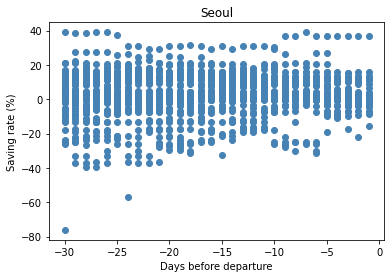

In [11]:
plt.scatter(df['col_days_bf_depart'], df['col_saving_rate'], color = 'steelblue')
plt.title("Seoul")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

# Remove Outlier

In [12]:
# taken from : https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
import pandas as pd

''' Detection '''
# IQR
# Calculate the upper and lower limits
median = df['col_saving_rate'].quantile(0.5)
Q1 = df['col_saving_rate'].quantile(0.25)
Q3 = df['col_saving_rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print('median %.4f' % median)
print('Q1 {0:.4f},Q3 {1:.4f}, IQR {2:.4f}, upper {3:.4f},lower {4:.4f}'.format(Q1, Q3, IQR, upper, lower))
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['col_saving_rate']>=upper)[0]
lower_array = np.where(df['col_saving_rate']<=lower)[0]
 
# # Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# # Print the new shape of the DataFrame
print("New Shape: ", df.shape)

median 1.3180
Q1 0.1522,Q3 9.8823, IQR 9.7301, upper 24.4774,lower -14.4429
New Shape:  (2138, 11)


# Plot graph (af outlier removed)

Data after outliner removal


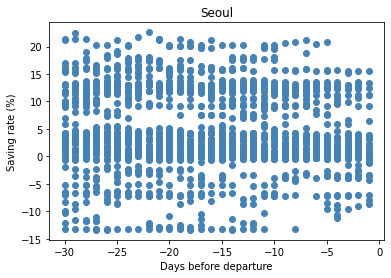

In [13]:
print("Data after outliner removal")
plt.scatter(df['col_days_bf_depart'], df['col_saving_rate'], color = 'steelblue')
plt.title("Seoul")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

# 1) Linear Regression

In [14]:
import numpy as np

x = []
y = []
for index, row in df.iterrows():
    x.append([row['col_days_bf_depart']])
    y.append([row['col_saving_rate']])
    
len(x), len(y)

(2138, 2138)

Linear regression------------------------------
Coefficients: [[-0.13367289]] 
Intercept: [2.05458656]
y_hat = 2.05  -0.13 x
Mean squared error: 45.85
Mean absolute error: 5.28
Coefficient of determination: 0.03


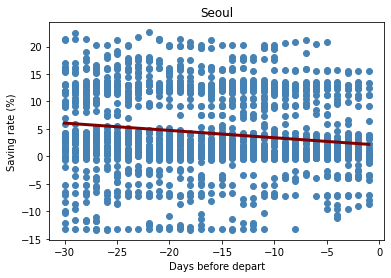

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
lnr_clf = linear_model.LinearRegression()

# Train the model using the training sets
lnr_clf.fit(x, y)

# predit saving rate using train data
lnr_y_pred = lnr_clf.predict(x)

print("Linear regression" + "-"*30)
print("Coefficients: {0} \nIntercept: {1}".format(lnr_clf.coef_, lnr_clf.intercept_))
print("y_hat = %.2f" % lnr_clf.intercept_[0] , ' %.2f' % lnr_clf.coef_[0][0], 'x' )

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, lnr_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, lnr_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, lnr_y_pred))

# Plot outputs
plt.scatter(x, y, color = 'steelblue')
plt.plot(x, lnr_y_pred, color = 'maroon', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Seoul")
plt.xlabel("Days before depart")
plt.ylabel("Saving rate (%)")

plt.show()

# 2) Isotonic Regression

Ref :
* theory : https://scikit-learn.org/stable/modules/isotonic.html
* function : https://scikit-learn.org/stable/modules/generated/sklearn.isotonic.IsotonicRegression.html#sklearn.isotonic.IsotonicRegression

In [16]:
df

route       airline_nm  direct depart_dt col_pre_depart_dt  \
0     LON-to-ICN  Asiana Airlines  direct       1/5        2023-05-01   
1     LON-to-ICN       Korean Air  direct       1/5        2023-05-01   
2     LON-to-ICN  Virgin Atlantic  direct       1/5        2023-05-01   
3     LON-to-ICN  Asiana Airlines  direct       1/5        2023-05-01   
4     LON-to-ICN       Korean Air  direct       1/5        2023-05-01   
...          ...              ...     ...       ...               ...   
2314  LON-to-ICN  Virgin Atlantic  direct       9/5        2023-05-09   
2315  LON-to-ICN  Asiana Airlines  direct       9/5        2023-05-09   
2316  LON-to-ICN  Asiana Airlines  direct       9/5        2023-05-09   
2317  LON-to-ICN       Korean Air  direct       9/5        2023-05-09   
2318  LON-to-ICN  Virgin Atlantic  direct       9/5        2023-05-09   

       search_dt  col_days_bf_depart  ticket_price  price_on_depart_date  \
0     2023-04-01                 -30         599.0                 607.0   
1     2023-04-01                 -30         598.0                 623.0   
2     2023-04-01                 -30         637.0                 653.0   
3     2023-04-02                 -29         599.0                 607.0   
4     2023-04-02                 -29         598.0                 623.0   
...          ...                 ...           ...                   ...   
2314  2023-05-07                  -2         648.0                 660.0   
2315  2023-05-08                  -1         605.0                 605.0   
2316  2023-05-08                  -1         626.0                 605.0   
2317  2023-05-08                  -1         620.0                 625.0   
2318  2023-05-08                  -1         659.0                 660.0   

      col_saving_rate col_day_of_week  
0            1.317957          Monday  
1            4.012841          Monday  
2            2.450230          Monday  
3            1.317957          Monday  
4            4.012841          Monday  
...               ...             ...  
2314         1.818182         Tuesday  
2315         0.000000         Tuesday  
2316        -3.471074         Tuesday  
2317         0.800000         Tuesday  
2318         0.151515         Tuesday  

[2138 rows x 11 columns]

In [17]:
x = df['col_days_bf_depart'].to_numpy()
y = df['col_saving_rate'].to_numpy()

type(x), x.shape, type(y), y.shape

(numpy.ndarray, (2138,), numpy.ndarray, (2138,))

In [18]:
import math
math.ceil(np.max(y)), math.floor(np.min(y))

(23, -14)

Isotonic Regression ------------------------------
param: 
{'increasing': 'auto', 'out_of_bounds': 'nan', 'y_max': 23, 'y_min': -14}
Mean squared error: 45.37
Mean absolute error: 5.23
Coefficient of determination: 0.04


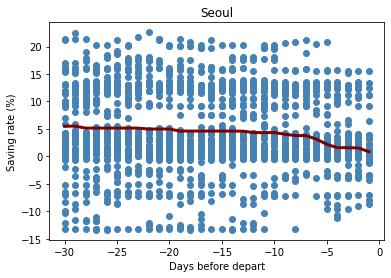

In [19]:
from sklearn.isotonic import IsotonicRegression

# classifier creation
iso_clf = IsotonicRegression(increasing = 'auto', y_min = math.floor(np.min(y)) , y_max = math.ceil(np.max(y)))

# train model & predict
iso_y_pred = iso_clf.fit_transform(x, y)

print("Isotonic Regression " + "-"*30)
print("param: \n{0}".format(iso_clf.get_params()))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
# plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(x, y, color = 'steelblue')
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)

plt.title("Seoul")
plt.xlabel("Days before depart")
plt.ylabel("Saving rate (%)")

plt.show()

In [20]:
iso_clf.X_thresholds_, len(iso_clf.X_thresholds_)

(array([-30., -29., -28., -23., -22., -20., -19., -14., -13., -12., -10.,
         -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.]),
 20)

In [21]:
iso_clf.y_thresholds_, len(iso_clf.y_thresholds_)

(array([5.506859  , 5.506859  , 5.14973833, 5.14973833, 4.98100207,
        4.98100207, 4.60911495, 4.60911495, 4.58858844, 4.33271411,
        4.33271411, 4.02602476, 3.78615684, 3.78615684, 3.13998124,
        2.18338966, 1.58994671, 1.58994671, 1.52534904, 0.85304716]),
 20)

Isotonic Regression


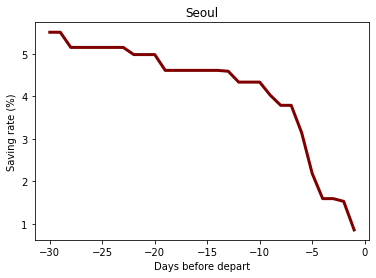

In [22]:
print("Isotonic Regression")
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)
plt.title("Seoul")
plt.xlabel("Days before depart")
plt.ylabel("Saving rate (%)")

plt.show()

## Simplify

Simplified Isotonic Regression


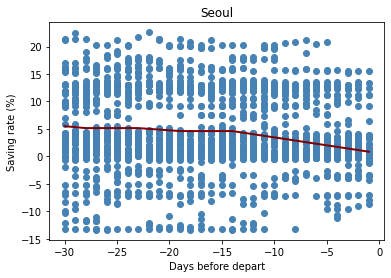

In [23]:
x_sim = [-30 ,-28 ,-23 ,-19 ,-14 ,-1]
y_sim = [5.506859 ,5.14973833 ,5.14973833 ,4.60911495 ,4.60911495 ,0.85304716 ]

print("Simplified Isotonic Regression")

plt.scatter(x, y, color = 'steelblue')
plt.plot(x_sim, y_sim, color = 'maroon', linewidth=2, label="Isotonic Simplify")

plt.title("Seoul")
plt.xlabel("Days before depart")
plt.ylabel("Saving rate (%)")

plt.show()

Simplified Isotonic Regression


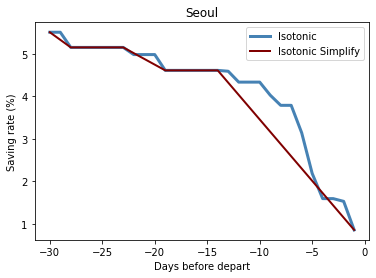

In [24]:
x_sim = [-30 ,-28 ,-23 ,-19 ,-14 ,-1]
y_sim = [5.506859 ,5.14973833 ,5.14973833 ,4.60911495 ,4.60911495 ,0.85304716 ]

print("Simplified Isotonic Regression")

plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'steelblue', linewidth=3, label="Isotonic")
plt.plot(x_sim, y_sim, color = 'maroon', linewidth=2, label="Isotonic Simplify")

plt.title("Seoul")
plt.xlabel("Days before depart")
plt.ylabel("Saving rate (%)")

plt.legend()
plt.show()

In [25]:
x_sim = [-30 ,-23 ,-19 ,-14 ,-1]
y_sim = [5.506859,5.14973833 ,4.60911495 ,4.60911495 ,0.85304716 ]

print("Simplified Isotonic Regression")

plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'steelblue', linewidth=3, label="Isotonic")
plt.plot(x_sim, y_sim, color = 'maroon', linewidth=2, label="Isotonic Simplify")

plt.title("Seoul")
plt.xlabel("Days before depart")
plt.ylabel("Saving rate (%)")

plt.legend()
plt.show()

Simplified Isotonic Regression


In [26]:
x_sim = [-30 ,-23 ,-19 ,-10 ,-1]
y_sim = [5.506859,5.14973833 ,4.60911495 ,4.33271411 ,0.85304716 ]

print("Simplified Isotonic Regression")

plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'steelblue', linewidth=3, label="Isotonic")
plt.plot(x_sim, y_sim, color = 'maroon', linewidth=2, label="Isotonic Simplify")

plt.title("Seoul")
plt.xlabel("Days before depart")
plt.ylabel("Saving rate (%)")

plt.legend()
plt.show()

Simplified Isotonic Regression


Simplified Isotonic Regression


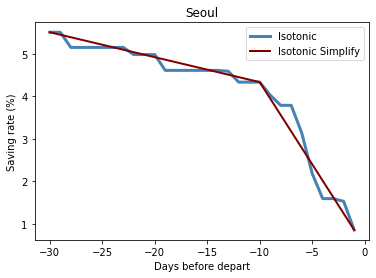

In [27]:
x_sim = [-30 ,-10 ,-1]
y_sim = [5.506859,4.33271411 ,0.85304716 ]

print("Simplified Isotonic Regression")

plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'steelblue', linewidth=3, label="Isotonic")
plt.plot(x_sim, y_sim, color = 'maroon', linewidth=2, label="Isotonic Simplify")

plt.title("Seoul")
plt.xlabel("Days before depart")
plt.ylabel("Saving rate (%)")

plt.legend()
plt.show()

## Equations

In [28]:
x_sim, y_sim

([-30, -10, -1], [5.506859, 4.33271411, 0.85304716])

In [29]:
for i in range(0, len(x_sim)-1):
    print("-"*30, "\n", "{0}: x in [{1},{2}]".format(i+1, x_sim[i], x_sim[i+1]))
    # m = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    b1 = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    print('slope ', b1)

    b0 = get_intercept(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print('intercept ', b0)

    get_linear_equation(b0,b1)

------------------------------ 
 1: x in [-30,-10]
slope  -0.0587072445
-30 5.506859 -10 4.33271411 -0.0587072445
intercept  3.745641665
y = 3.75  -0.06 *x
------------------------------ 
 2: x in [-10,-1]
slope  -0.3866296611111112
-10 4.33271411 -1 0.85304716 -0.3866296611111112
intercept  0.4664174988888887
y = 0.47  -0.39 *x


## MSE

In [30]:
def y_predict(x):
    y = 0
    if x >= -30 and x < -10:
        y = 3.75  -0.06 *x
    else:
        y = 0.47  -0.39 *x
    return y

Iso (simpliflied)------------------------------
Mean squared error: 45.45
Mean absolute error: 5.24
Coefficient of determination: 0.04


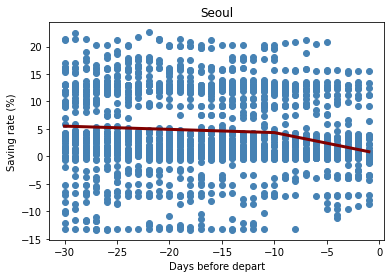

In [31]:
# predict using simpliflied isotonic
iso_y_pred = []
for i in x:
    iso_y_pred.append(y_predict(i))

print("Iso (simpliflied)" + "-"*30)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
plt.scatter(x, y, color = 'steelblue')
plt.plot(x_sim, y_sim, color = 'maroon', linewidth=3)

plt.title("Seoul")
plt.xlabel("Days before depart")
plt.ylabel("Saving rate (%)")

plt.show()

## Result

* trend change on day -10
* but compare overall the saving rate not change much < 6% absolute change rate
* the early buy the better